In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
L = 1.0
nx = 51
dx = L/(nx - 1)
alpha = 1.22e-3
q = 0.0

x = numpy.linspace(0.0, L, num = nx)

T0 = numpy.zeros_like(x)
T0[0] = 100.0

In [4]:
from scipy import linalg

In [17]:
def lhs_operator(N, sigma):
    """
    Computes and returns the implicit operator
    of the system for the 1D diffusion equation.
    We use backward Euler method, Dirichlet condition
    on the left side of the domain and zero-gradient
    Neumann condition on the right side.
    
    Parameters
    ----------
    N : integer
        Number of interior points.
    sigma : float
        Value of alpha * dt / dx**2.
    
    Returns
    -------
    A : numpy.ndarray
        The implicit operator as a 2D array of floats
        of size N by N.
    """
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    D[-1, -1] = 1.0 + 1.0 / sigma
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k = 1)
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    A = D + U + L
    return A

In [18]:
def rhs_vector(T, sigma, qdx):
    """
    Computes and returns the right-hand side of the system
    for the 1D diffusion equation, using a Dirichlet condition
    on the left side and a Neumann condition on the right side.
    
    Parameters
    ----------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    sigma : float
        Value of alpha * dt / dx**2.
    qdx : float
        Value of the temperature flux at the right side.
    
    Returns
    -------
    b : numpy.ndarray
        The right-hand side of the system as a 1D array of floats.
    """
    b = T[1:-1] / sigma
    b[0] += T[0]
    b[-1] += qdx
    return b

In [19]:
def btcs_implicit(T0, nt, dt, dx, alpha, q):
    """
    Computes and returns the temperature along the rod
    after a given number of time steps.
    
    The function uses Euler implicit in time,
    central differencing in space, a Dirichlet condition
    on the left side, and a Neumann condition on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 1D array of floats.
    nt : integer
        Number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Distance between two consecutive locations.
    alpha : float
        Thermal diffusivity of the rod.
    q : float
        Value of the temperature gradient on the right side.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    """
    sigma = alpha * dt / dx**2
    A = lhs_operator(len(T0) - 2, sigma)
    T = T0.copy()
    for n in range(nt):
        b = rhs_vector(T, sigma, q * dx)
        T[1:-1] = linalg.solve(A, b)
        T[-1] = T[-2] + q * dx
    return T
    

In [20]:
sigma = 0.5
dt = sigma * dx**2 / alpha 
nt = 1000
T = btcs_implicit(T0, nt, dt, dx, alpha, q)

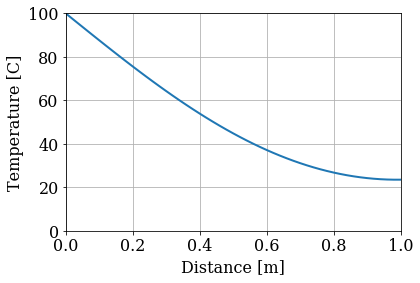

In [21]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

This is similar to the previous module however, any sigma is valid <br>see below

In [28]:
sigma = 10
dt = sigma * dx**2 / alpha 
nt = 50
T = btcs_implicit(T0, nt, dt, dx, alpha, q)

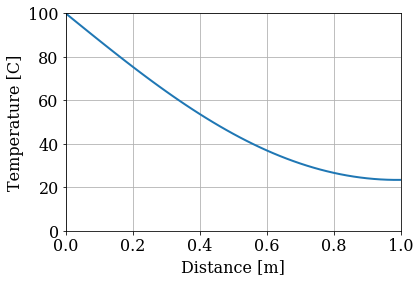

In [29]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);